# ***$College$ $Placement$ $Prediction$***

`This is a machine learning model to predict wether a student got placement into college or not. This analysis made based on features such as IQ, internship experience, academic performance, among others. The goal of this project is to build an end-to-end machine learning model to be able to predict whether a student will receive placement into college based on the certain feeatures`

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore') # suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# load dataset
if os.path.exists('../data/CollegePlacement.csv'):
    df = pd.read_csv('../data/CollegePlacement.csv')
else:
    raise FileNotFoundError('File Not Found! Check file-path and try again!')

# ***$Basic$ $Exploratory$ $Data$ $Analysis$***

In [4]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
College_ID,10000,100,CLG0062,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQ,10000.0,NaN,NaN,NaN,99.4718,15.053101,41.0,89.0,99.0,110.0,158.0
Prev_Sem_Result,10000.0,NaN,NaN,NaN,7.535673,1.447519,5.0,6.29,7.56,8.79,10.0
CGPA,10000.0,NaN,NaN,NaN,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,NaN,NaN,NaN,5.5464,2.873477,1.0,3.0,6.0,8.0,10.0
Internship_Experience,10000,2,No,6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extra_Curricular_Score,10000.0,NaN,NaN,NaN,4.9709,3.160103,0.0,2.0,5.0,8.0,10.0
Communication_Skills,10000.0,NaN,NaN,NaN,5.5618,2.900866,1.0,3.0,6.0,8.0,10.0
Projects_Completed,10000.0,NaN,NaN,NaN,2.5134,1.715959,0.0,1.0,3.0,4.0,5.0
Placement,10000,2,No,8341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns.tolist()

['College_ID',
 'IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Internship_Experience',
 'Extra_Curricular_Score',
 'Communication_Skills',
 'Projects_Completed',
 'Placement']

`Numeric columns `

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for i,col in enumerate(numeric_cols,1):
    print(f'{i}. {col:<25} -Min : {df[col].min():<10} -Max : {df[col].max()}')

1. IQ                        -Min : 41         -Max : 158
2. Prev_Sem_Result           -Min : 5.0        -Max : 10.0
3. CGPA                      -Min : 4.54       -Max : 10.46
4. Academic_Performance      -Min : 1          -Max : 10
5. Extra_Curricular_Score    -Min : 0          -Max : 10
6. Communication_Skills      -Min : 1          -Max : 10
7. Projects_Completed        -Min : 0          -Max : 5


`Categorical Columns`

In [18]:
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for i,col in enumerate(categorical_cols,1):
    print(f'{i}. {col} - {df[col].unique()} - {df[col].nunique()}')

1. College_ID - ['CLG0030' 'CLG0061' 'CLG0036' 'CLG0055' 'CLG0004' 'CLG0015' 'CLG0071'
 'CLG0096' 'CLG0097' 'CLG0057' 'CLG0063' 'CLG0077' 'CLG0064' 'CLG0017'
 'CLG0053' 'CLG0040' 'CLG0070' 'CLG0050' 'CLG0068' 'CLG0072' 'CLG0034'
 'CLG0087' 'CLG0073' 'CLG0024' 'CLG0008' 'CLG0025' 'CLG0018' 'CLG0014'
 'CLG0006' 'CLG0082' 'CLG0090' 'CLG0075' 'CLG0094' 'CLG0089' 'CLG0016'
 'CLG0076' 'CLG0047' 'CLG0054' 'CLG0058' 'CLG0100' 'CLG0046' 'CLG0001'
 'CLG0041' 'CLG0093' 'CLG0027' 'CLG0062' 'CLG0081' 'CLG0028' 'CLG0020'
 'CLG0051' 'CLG0069' 'CLG0088' 'CLG0038' 'CLG0029' 'CLG0035' 'CLG0019'
 'CLG0005' 'CLG0026' 'CLG0066' 'CLG0045' 'CLG0043' 'CLG0074' 'CLG0048'
 'CLG0012' 'CLG0099' 'CLG0011' 'CLG0091' 'CLG0083' 'CLG0080' 'CLG0044'
 'CLG0059' 'CLG0031' 'CLG0039' 'CLG0065' 'CLG0079' 'CLG0095' 'CLG0085'
 'CLG0033' 'CLG0007' 'CLG0037' 'CLG0032' 'CLG0049' 'CLG0056' 'CLG0084'
 'CLG0067' 'CLG0098' 'CLG0042' 'CLG0021' 'CLG0009' 'CLG0010' 'CLG0078'
 'CLG0013' 'CLG0003' 'CLG0092' 'CLG0086' 'CLG0023' 'CLG0022' 

#   ***$Advanced$ $Data$ $Exploratory$ $Analysis$***

`Missing Data`

In [19]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_values = pd.DataFrame({
    'missing data' : missing,
    'missing pct' : missing_pct.round(2)
})
print(missing_values)

                        missing data  missing pct
College_ID                         0          0.0
IQ                                 0          0.0
Prev_Sem_Result                    0          0.0
CGPA                               0          0.0
Academic_Performance               0          0.0
Internship_Experience              0          0.0
Extra_Curricular_Score             0          0.0
Communication_Skills               0          0.0
Projects_Completed                 0          0.0
Placement                          0          0.0


$Insight$ $-$ $No$  $Missing$  $Data$

`Duplicate Data`

In [21]:
df[df.duplicated()]

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement


$Insight$ $-$ $No$ $Duplicates$

`Outlier Detection Using IQR`

In [25]:
for i,col in enumerate(numeric_cols,1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1     # inter-quartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{i}. {col:<23} - {len(outliers)} oultiers (Range: {lower_bound:.2f} - {upper_bound:.2f})')

1. IQ                      - 61 oultiers (Range: 57.50 - 141.50)
2. Prev_Sem_Result         - 0 oultiers (Range: 2.54 - 12.54)
3. CGPA                    - 0 oultiers (Range: 2.57 - 12.49)
4. Academic_Performance    - 0 oultiers (Range: -4.50 - 15.50)
5. Extra_Curricular_Score  - 0 oultiers (Range: -7.00 - 17.00)
6. Communication_Skills    - 0 oultiers (Range: -4.50 - 15.50)
7. Projects_Completed      - 0 oultiers (Range: -3.50 - 8.50)


$Insight : $
~`The Column 'IQR' has 61 outliers`~

In [30]:
from scipy.stats import normaltest
for i,col in enumerate(numeric_cols):
    stat, p_value = normaltest(df[col])
    is_normal = 'Normal' if p_value > 0.05 else 'Not Normal'
    print(f"{i}. {col:<23} : D'Agostino test p-value = {p_value:.2f} ({is_normal})")

0. IQ                      : D'Agostino test p-value = 0.85 (Normal)
1. Prev_Sem_Result         : D'Agostino test p-value = 0.00 (Not Normal)
2. CGPA                    : D'Agostino test p-value = 0.00 (Not Normal)
3. Academic_Performance    : D'Agostino test p-value = 0.00 (Not Normal)
4. Extra_Curricular_Score  : D'Agostino test p-value = 0.00 (Not Normal)
5. Communication_Skills    : D'Agostino test p-value = 0.00 (Not Normal)
6. Projects_Completed      : D'Agostino test p-value = 0.00 (Not Normal)


$Insight : $ ~`Only the column 'IQ' follows a normal distribution`~

# ***$Advanced$ $Visualizations$***

`Univariate Analysis`

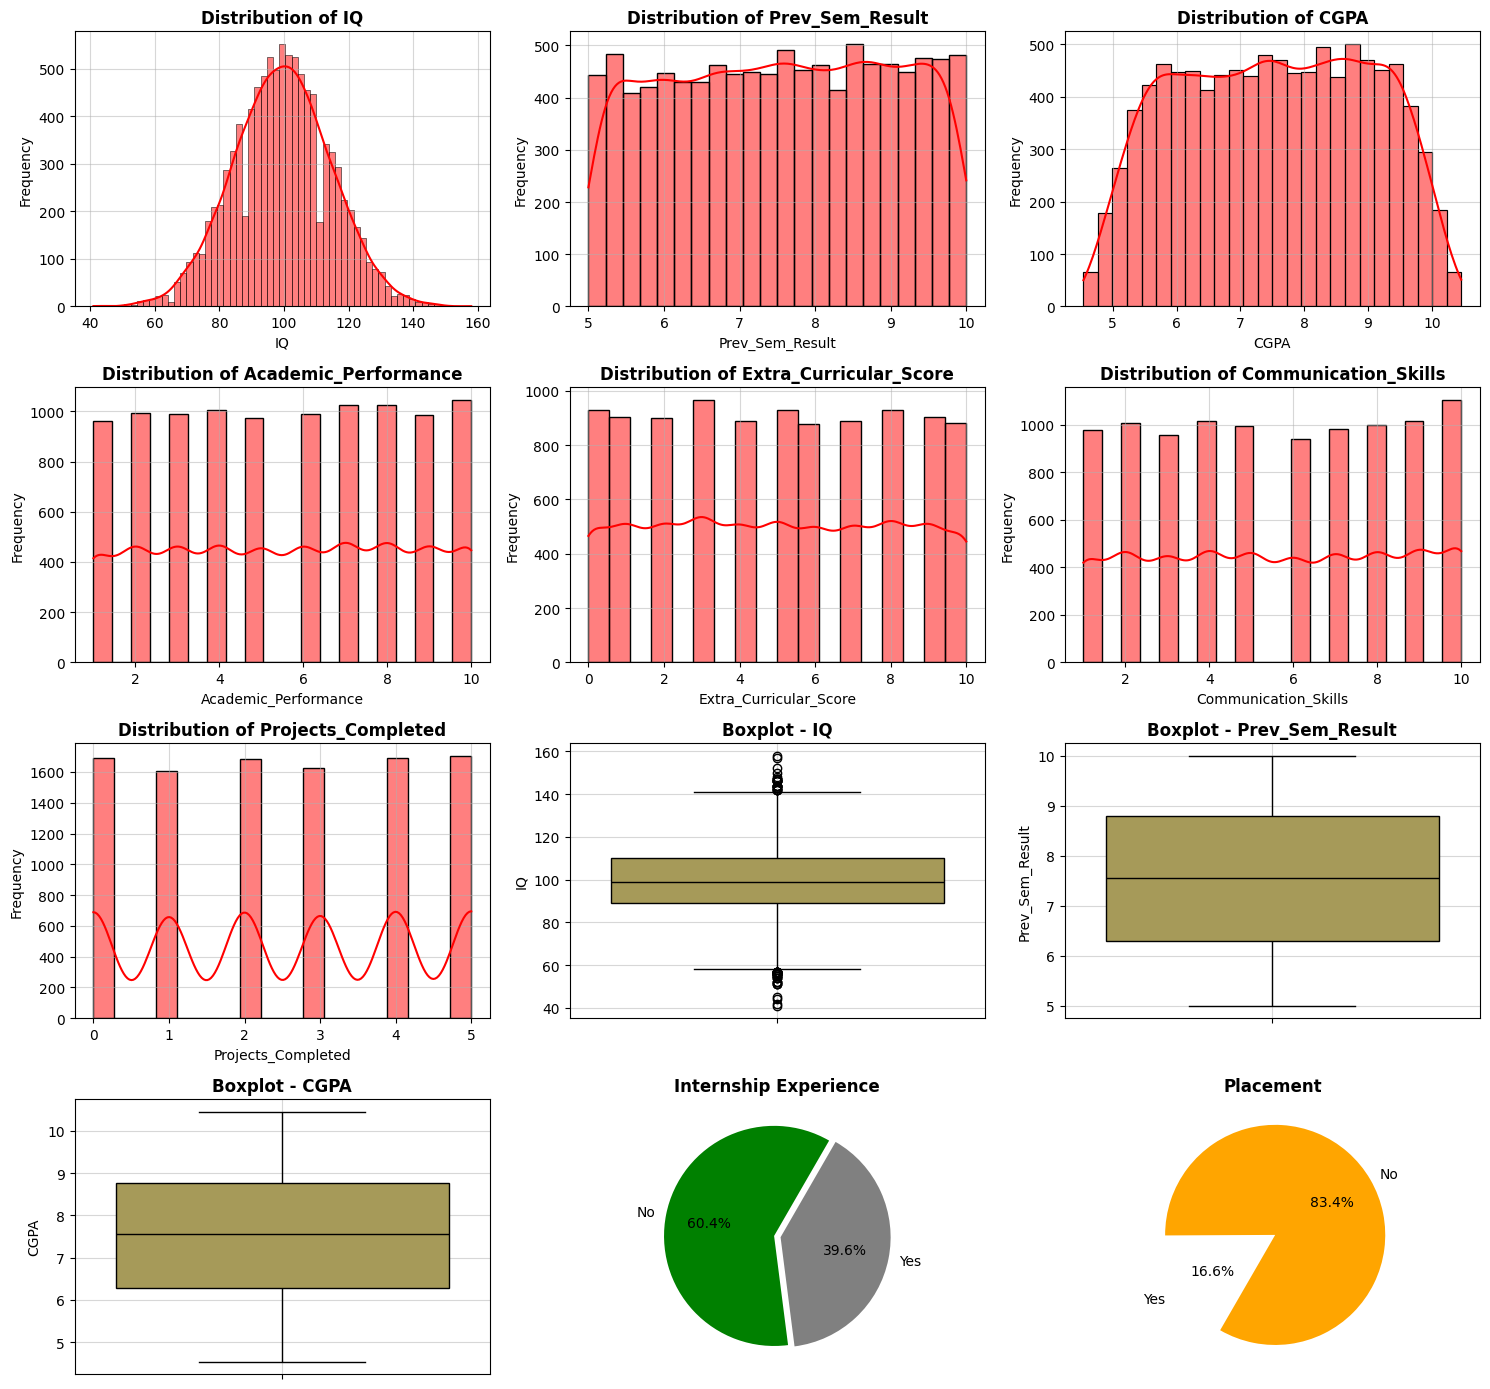

In [ ]:
plt.figure(figsize=(15,14))

# data distribution for numeric columns
for i,col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=df[col], kde=True, alpha=0.5,color= 'red')
    plt.title(f'Distribution of {col}',fontsize=12,fontweight='bold')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.5)

# visual outlier detection for the first 3 columns
for i,col in enumerate(numeric_cols[:3]):
    plt.subplot(4, 3, 8+i)
    sns.boxplot(data=df, y=df[col],color='gold',linecolor='black',saturation=0.3)
    plt.title(f'Boxplot - {col}',fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.5)

plt.subplot(4, 3, 11)
plt.pie(data=df,x=df['Internship_Experience'].value_counts(),labels=df['Internship_Experience'].unique(),
        autopct='%1.1f%%',colors=['green','grey'],explode=[0.03,0.03],startangle=60)
plt.title('Internship Experience',fontsize=12, fontweight='bold')

plt.subplot(4, 3, 12)
plt.pie(data=df,x=df['Placement'].value_counts(),labels=df['Placement'].unique(),
        autopct='%1.1f%%',colors=['orange','white'],explode=[0.03,0.03],startangle=240)
plt.title('Placement',fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

`Multivariate Analysis`

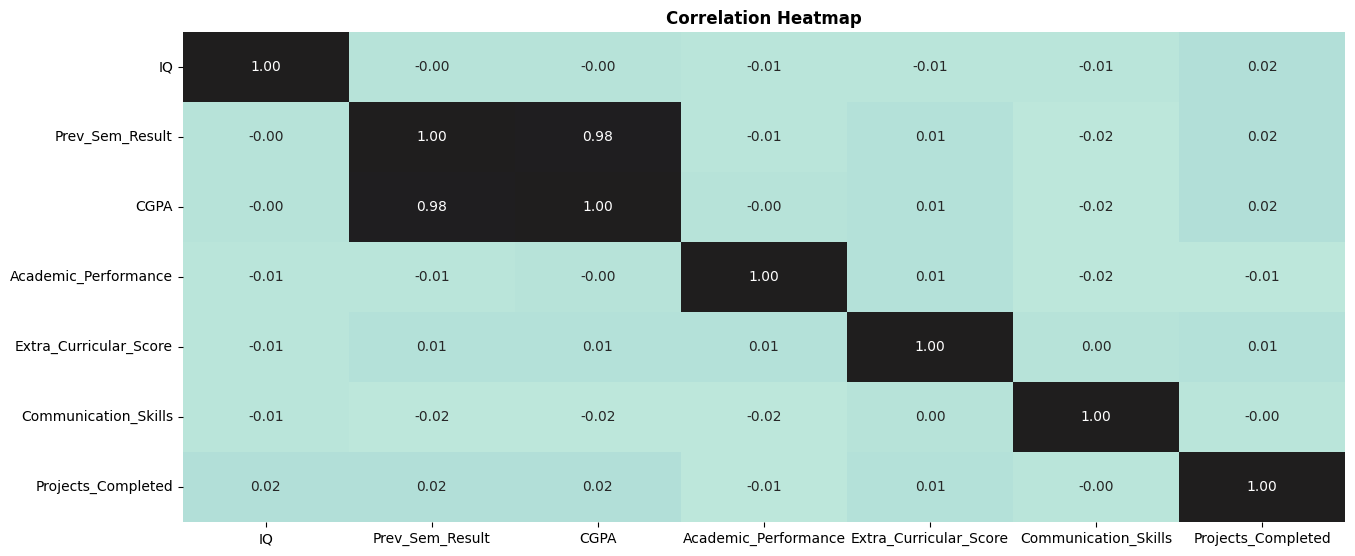

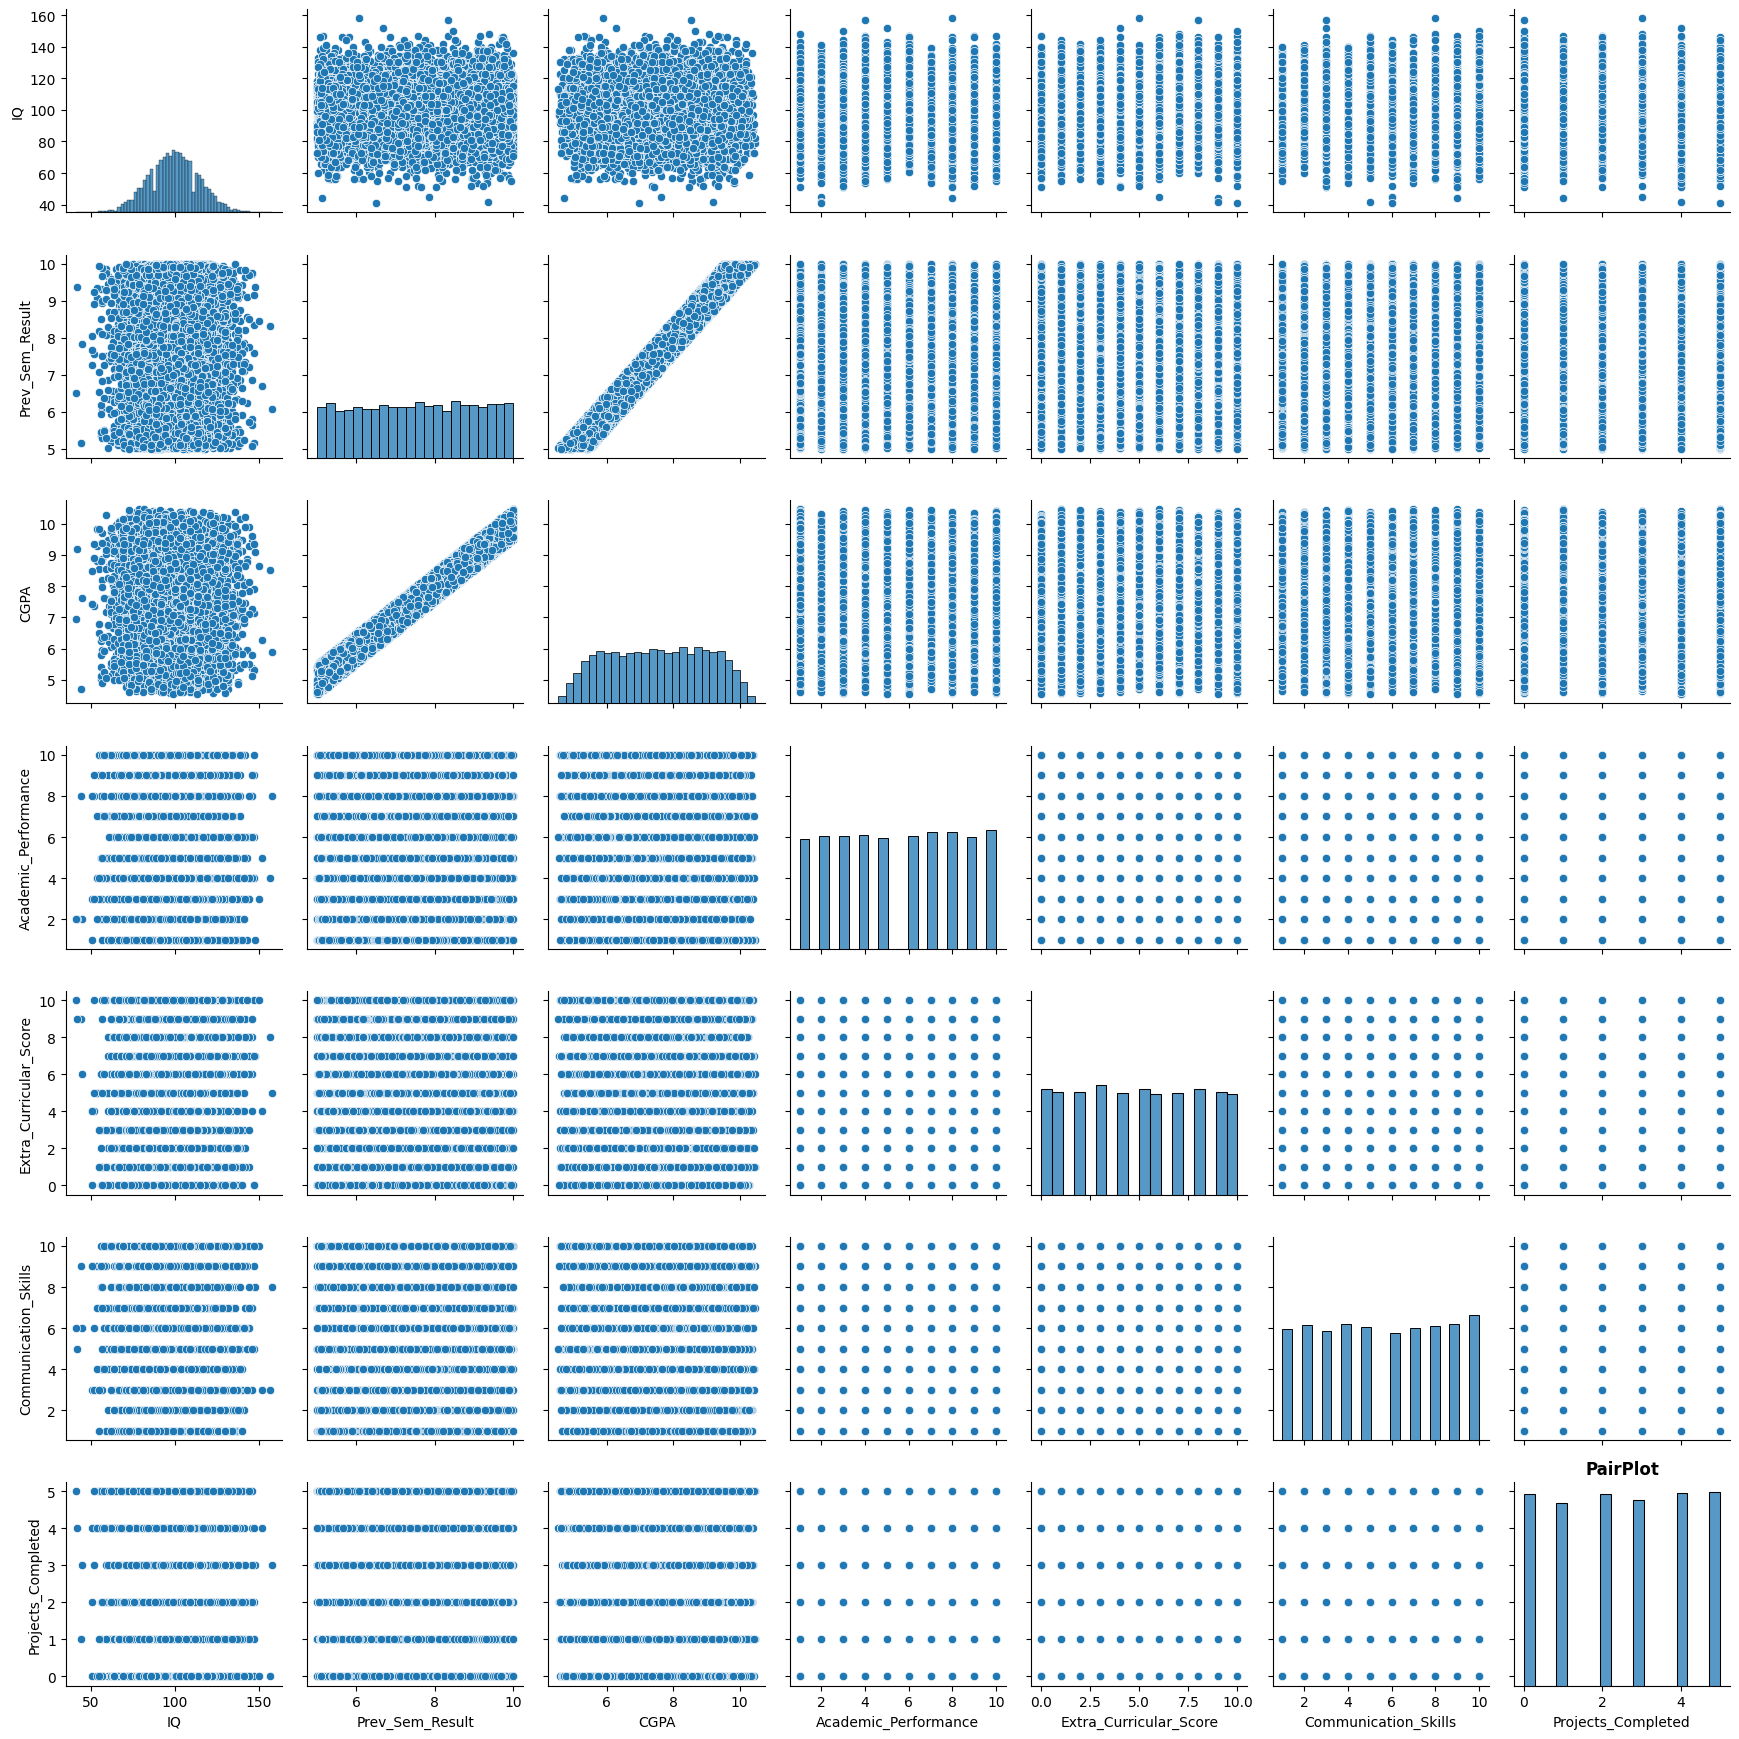

In [ ]:
# correlation heatmap
plt.figure(figsize=(15,14))
plt.subplot(2, 1, 1)
corr = df.corr(method='spearman',numeric_only=True)
sns.heatmap(data=corr, cbar= False, annot= True, fmt= '.2f',center=True, linecolor='white')
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')

# pairplot
plt.subplot(2, 1, 1)
sns.pairplot(data=df)
plt.title('PairPlot',fontsize=12,fontweight='bold')

plt.tight_layout()
plt.show()

$Insights$ : 
~`The columns, 'CGPA' and 'Prev_Sem_Result' are highly correlated`~
